Форма массива X_test: (25, 2)
Форма решающей функции: (25,)
Решающая функция:
 [ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]
Решающая функция с порогом отсечения:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
pred идентичен прогнозам: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Минимум решающей функции: -7.6909717851019
Максимум решающей функции: 4.289866423997604



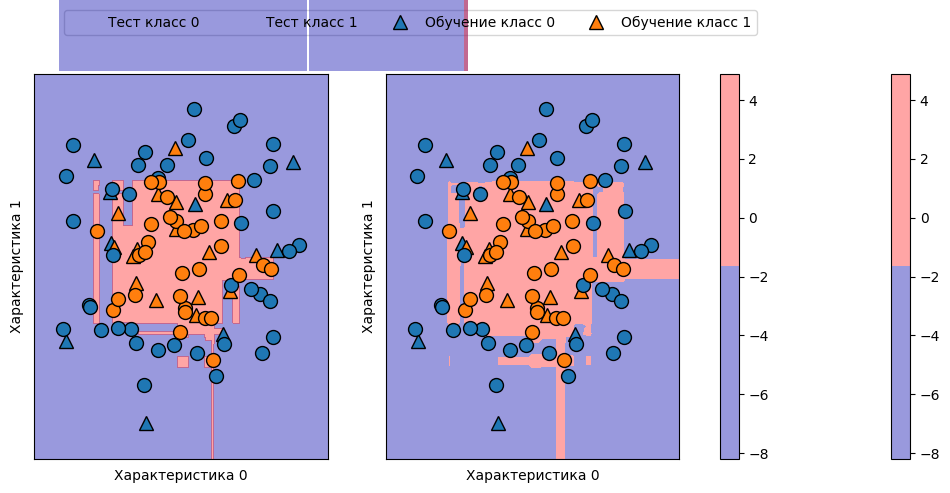

Форма вероятностей: (25, 2)
Спрогнозированные результаты:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]



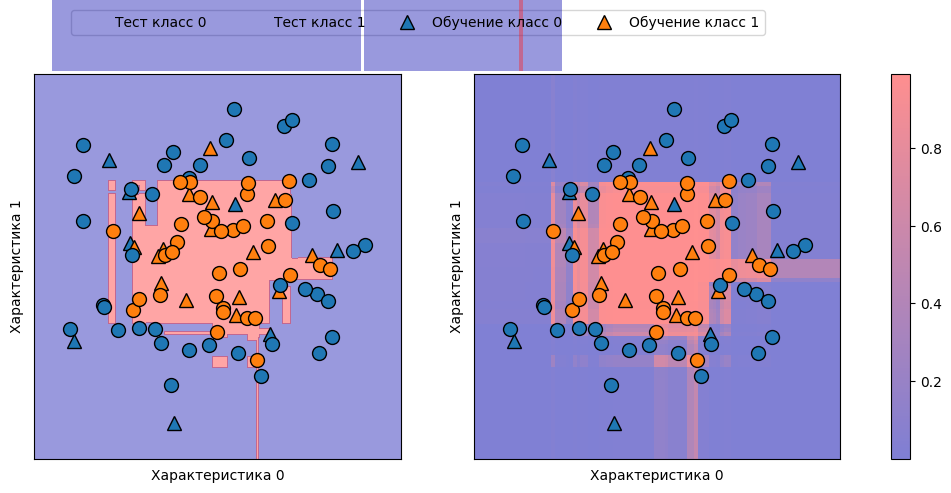

Форма решающей функции: (38, 3)
Решающая функция:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
Argmax решающей функции: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Спрогнозирование вероятностей: [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Суммы: [1. 1. 1. 1. 1. 1.]
Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]

Уникальные классы в обучающем наборе: 

In [1]:
import warnings

import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

def make_circles_show():
    X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
    y_named = np.array(['blue', 'red'])[y]

    X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
    gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

    print(f'Форма массива X_test: {X_test.shape}\n'
          f'Форма решающей функции: {gbrt.decision_function(X_test).shape}\n'
          f'Решающая функция:\n {gbrt.decision_function(X_test)[:6]}\n'
          f'Решающая функция с порогом отсечения:\n {gbrt.decision_function(X_test) > 0}\n'
          f'Прогнозы:\n{gbrt.predict(X_test)}')

    greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
    pred = gbrt.classes_[greater_zero]
    print(f'pred идентичен прогнозам: {pred == gbrt.predict(X_test)}')

    decision_function = gbrt.decision_function(X_test)
    print(f'Минимум решающей функции: {np.min(decision_function)}\n'
          f'Максимум решающей функции: {np.max(decision_function)}\n')

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    mglearn.plots.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.cm2)
    for ax in axes:
        mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
        ax.set_xlabel('Характеристика 0')
        ax.set_ylabel('Характеристика 1')
        plt.colorbar(scores_image, ax=axes.tolist())
        axes[0].legend(['Тест класс 0', 'Тест класс 1', 'Обучение класс 0', 'Обучение класс 1'], ncol=4, loc=(0.1, 1.1))
    plt.show()

    print(f'Форма вероятностей: {gbrt.predict_proba(X_test).shape}\n'
          f'Спрогнозированные результаты:\n{gbrt.predict_proba(X_test)[:6]}\n')
    # первый элемент строки –это оценка вероятности первого класса
    # второй элемент строки –это оценка вероятности второго класса
    
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba')

    for ax in axes:
        mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
        ax.set_xlabel('Характеристика 0')
        ax.set_ylabel('Характеристика 1')
    plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(['Тест класс 0', 'Тест класс 1', 'Обучение класс 0', 'Обучение класс 1'], ncol=4, loc=(0.1, 1.1))
    plt.show()


def iris_show():
    iris = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

    gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0).fit(X_train, y_train)
    print(f'Форма решающей функции: {gbrt.decision_function(X_test).shape}\n'
          f'Решающая функция:\n{gbrt.decision_function(X_test)[:6, :]}\n'
          f'Argmax решающей функции: {np.argmax(gbrt.decision_function(X_test), axis=1)}\n'
          f'Прогнозы:\n {gbrt.predict(X_test)}\n'
          f'Спрогнозирование вероятностей: {gbrt.predict_proba(X_test)[:6]}\n'
          f'Суммы: {gbrt.predict_proba(X_test)[:6].sum(axis=1)}\n'
          f'Argmax спрогнозированных вероятностей:\n{np.argmax(gbrt.predict_proba(X_test), axis=1)}\n'
          f'Прогнозы: {gbrt.predict(X_test)}\n')

    logreg = LogisticRegression()
    named_target = iris.target_names[y_train]
    logreg.fit(X_train, named_target)
    argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)

    print(f'Уникальные классы в обучающем наборе: {logreg.classes_}\n'
          f'Прогнозы: {logreg.predict(X_test)[:10]}\n'
          f'Argmax решающей функции: {argmax_dec_func[:10]}\n'
          f'Argmax объединённый с классами: {logreg.classes_[argmax_dec_func][:10]}')


def main():
    warnings.filterwarnings('ignore')

    make_circles_show()
    iris_show()
    pass


main()